In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"

dg = pd.read_pickle(dir)
dg = dg.fillna(0)
#df = dg.iloc[:,:-24]
df = dg.iloc[:,:-50]

df["deg_0"] = np.log1p(dg[0.0])
df["deg_7"] = np.log1p(dg[0.12566370614359174])
df["deg_60"] = np.log1p(dg[1.0053096491487339])
df["deg_90"] = np.log1p(dg[1.5079644737231008])

df.describe()

/tmp/ipykernel_6213/3371631492.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dg = dg.fillna(0)


,lambda,shift,mean_bonds,std_bonds,mean_second_neighbours,std_second_neighbours,mean_size,std_size,largest,mean_radius_of_gyration,std_radius_of_gyration,deg_0,deg_7,deg_60,deg_90
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,14.951466,0.349861,1.482201,0.607201,0.959342,0.297412,6.379589,3.740624,20.782356,2.141318,2.848952,0.323620,0.460612,0.244569,0.150259
std,21.946442,0.216066,0.773294,0.243653,0.532607,0.274133,3.194507,2.372857,11.667600,2.261890,7.783199,0.485129,0.515139,0.246820,0.211782
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.150000,0.949000,0.446636,1.000000,0.000000,3.083229,1.552977,11.000000,0.415056,0.403406,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.350000,1.754000,0.613402,1.085714,0.287480,6.595243,4.014197,22.000000,1.124787,1.075129,0.115970,0.301381,0.195105,0.057493
75%,17.000000,0.550000,1.920000,0.747213,1.272513,0.492440,8.873874,5.506423,29.000000,3.484203,4.126953,0.320931,0.668473,0.443932,0.250996
max,100.000000,0.700000,2.908000,1.184160,2.147895,1.129984,14.676471,11.390761,59.000000,21.294041,176.940884,1.991442,1.608937,2.192519,2.192519


In [3]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df.iloc[:, 3:].values
X = StandardScaler().fit_transform(X)
labels = "s_" + df["shift"].astype(str) + "_" + df["lambda"].astype(str)

# Compute t-SNE
tsne_embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20, n_jobs=7).fit_transform(X)

# Build a DataFrame for Plotly
plot_df = pd.DataFrame({
    "TSNE-1": tsne_embedding[:, 0],
    "TSNE-2": tsne_embedding[:, 1],
    "Label": labels
})

# Plot with hover
fig = px.scatter(
    plot_df,
    x="TSNE-1",
    y="TSNE-2",
    color="Label",  # can be removed if too many categories
    hover_name="Label",
    title="t-SNE Embedding with Hover Labels",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("tsne.html", auto_open=True)

In [4]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.41816996 0.22570898]


In [5]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import IPython

def auto_set_plotly_renderer():
    try:
        shell = IPython.get_ipython().__class__.__name__
        if "ZMQInteractiveShell" in shell:
            # Likely Jupyter Notebook or JupyterLab
            pio.renderers.default = "notebook_connected"
        else:
            # Fallback for scripts or non-notebook shells
            pio.renderers.default = "browser"
    except Exception:
        pio.renderers.default = "browser"  # absolute fallback

auto_set_plotly_renderer()



# Prepare data for plotly
biplot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
biplot_df["Label"] = labels
biplot_df["Shift"] = df["shift"].values
biplot_df["Lambda"] = df["lambda"].values

fig = px.scatter(
    biplot_df,
    x="PC1", y="PC2",
    color="Label",
    hover_data=["Shift", "Lambda"],
    title="PCA Biplot (Interactive)",
    width=900,
    height=700
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("pca.html", auto_open=True)

Index(['mean_bonds', 'std_bonds', 'mean_second_neighbours',
       'std_second_neighbours', 'mean_size', 'std_size', 'largest',
       'mean_radius_of_gyration', 'std_radius_of_gyration', 'deg_0', 'deg_7',
       'deg_60', 'deg_90'],
      dtype='object') 13 13


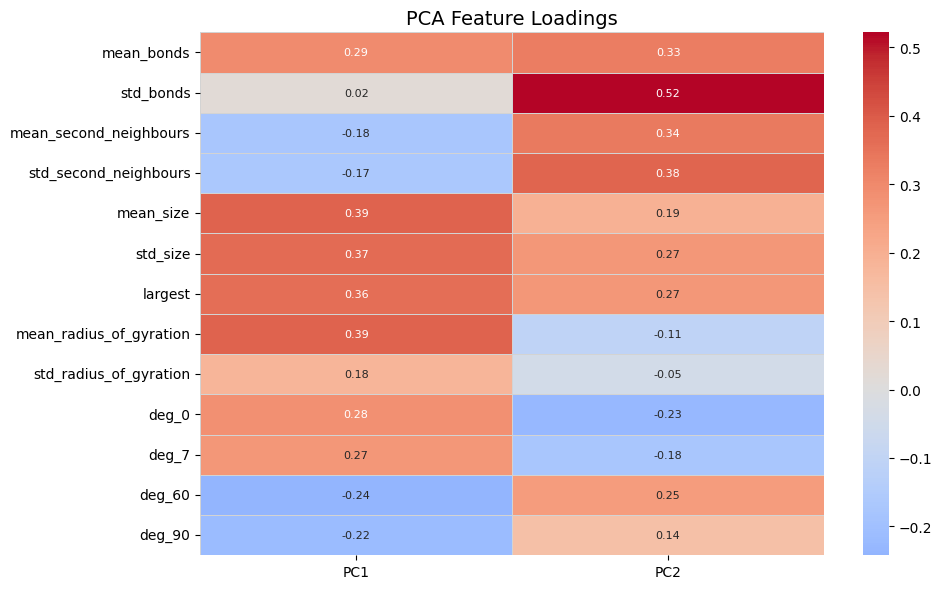

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefige'

In [6]:
# Create a DataFrame of loadings
feature_names = df.columns[3:]
print(feature_names, len(feature_names), len(pca.components_.T))

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=feature_names
)

# Display loadings sorted by absolute value in PC1
loadings.sort_values("PC1", key=abs, ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

# Set dynamic figure height based on number of features
n_features = len(loadings)
fig_height = max(6, n_features * 0.4)  # ensures readability for many features

plt.figure(figsize=(10, fig_height))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='lightgray')

plt.title("PCA Feature Loadings", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
plt.savefige("loadings.png",dpi=400)

In [ ]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Feature matrix and labels
feature_names = df.columns[3:]
y = labels  # already defined
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

#Define the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy scores
scores = cross_val_score(clf, X, y_encoded, cv=cv)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy: {:.3f}".format(np.mean(scores)))

# Cross-validated predictions
y_pred = cross_val_predict(clf, X, y_encoded, cv=cv)

# Classification report
print(classification_report(y_encoded, y_pred, target_names=class_names))

# Confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_encoded, y_pred, display_labels=class_names)
plt.title("Confusion Matrix (Cross-Validated Predictions)")
plt.show()

# Fit on full data (only for visualization)
clf_visual = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_visual.fit(X, y_encoded)

plt.figure(figsize=(16, 10))
plot_tree(clf_visual, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree (Visualization Only)")
plt.tight_layout()
plt.show()
'''

Cross-validation accuracy scores: [0.01515152 0.01896334 0.02275601 0.01769912 0.01769912]
Mean accuracy: 0.018


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

  s_0.05_0.5       0.02      0.25      0.03         8
 s_0.05_0.75       0.00      0.00      0.00         8
  s_0.05_1.0       0.00      0.00      0.00         8
 s_0.05_1.25       0.06      0.25      0.09         8
  s_0.05_1.5       0.12      0.50      0.20         8
 s_0.05_1.75       0.01      0.25      0.02         8
  s_0.05_1.8       0.01      0.12      0.03         8
  s_0.05_1.9       0.00      0.00      0.00         8
 s_0.05_10.0       0.01      0.25      0.02         8
s_0.05_100.0       0.29      1.00      0.44         8
 s_0.05_12.0       0.00      0.00      0.00         8
 s_0.05_15.0       0.00      0.25      0.01         8
 s_0.05_17.0       0.00      0.00      0.00         8
  s_0.05_2.0       0.01      0.25      0.03         8
  s_0.05_2.1       0.00      0.12      0.01         8
  s_0.05_2.3       0.00      0.00      0.00         8
  s_0.05_2.5       0.00      0.00      0.00         8
 s_0.05_20.0       0.00    

KeyboardInterrupt: 